In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import text
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import KFold
from sklearn.feature_extraction import text
import matplotlib.pyplot as plt
from string import punctuation
from collections import Counter
from nltk.corpus import stopwords

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer as sia
from textstat.textstat import *

/Users/hp/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#read data
def readData(filename):
    route = 'data/' + filename
    data = pd.read_csv(route, sep=',',index_col=0)
    return data

rawdata = readData('labeled_data.csv')
#rawdata.head(10)

In [3]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
import re

#tokenize each tweet into a list; just keep useful words
#return a list in which each element denotes the list of a tweet
def cleanData(dataSet):
    '''tokenize each tweet into a list; just keep useful words;
    return a list in which each element denotes the list of each tweet'''
    tweets=dataSet
    #build tables to remove punctuations
    table = str.maketrans('', '', punctuation)
    #add and delete words from stop_words
    stop_words = stopwords.words('english')[:]
    stop_words.extend(["#ff", "ff", "rt"])
    stop_words.remove('not')
    stop_words.remove('no')
    #build lemmatizer
    lemma = nltk.wordnet.WordNetLemmatizer()
    #build dictionary to convert contractions to standard lexicons
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "cause": "because", 
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he had",
    "he'd've": "he would have",
    "he'll": "he shall",
    "he'll've": "he shall have",
    "he's": "he has",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how has",
    "i'd": "I had",
    "i'd've": "I would have",
    "i'll": "I shall",
    "i'll've": "I shall have",
    "i'm": "I am",
    "i've": "I have",
    "isn't": "is not",
    "it'd": "it had",
    "it'd've": "it would have",
    "it'll": "it shall",
    "it'll've": "it shall have",
    "it's": "it has",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she had",
    "she'd've": "she would have",
    "she'll": "she shall",
    "she'll've": "she shall have",
    "she's": "she has",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that has",
    "there'd": "there had",
    "there'd've": "there would have",
    "there's": "there has",
    "they'd": "they had",
    "they'd've": "they would have",
    "they'll": "they shall",
    "they'll've": "they shall have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what shall",
    "what'll've": "what shall have",
    "what're": "what are",
    "what's": "what has",
    "what've": "what have",
    "when's": "when has",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where has",
    "where've": "where have",
    "who'll": "who shall",
    "who'll've": "who shall have",
    "who's": "who has",
    "who've": "who have",
    "why's": "why has",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had",
    "you'd've": "you would have",
    "you'll": "you shall",
    "you'll've": "you shall have",
    "you're": "you are",
    "you've": "you have",
    "that's": "that is",
    "ya": "you",
    "im": "I am"}
    #dont; cant; cannot;
    
    cleandata = []
    
    for tweet in tweets:
        #get rid of urls
        giant_url_regex = ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|''[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
        tweet = re.sub(giant_url_regex, '', tweet)
        snon1 = '&#[0-9]*;'
        tweet = re.sub(snon1, ' ', tweet)
        snon2 = '&#[0-9]*'
        tweet = re.sub(snon2, ' ', tweet)
        
        tokens = tweet.split()
        cleanstring = []
        for o in tokens:
            # change words to lowercase
            o = o.lower()
            # clean words that start as @
            if o.startswith('@'): continue
            if o.startswith(';@'): continue
            if o.startswith('"@'): continue
            #expand contractions
            o = contractions.get(o,o)
            # remove punctuation from each token
            o = o.translate(table)  
            # filter out short tokens 
            if len(o) < 2: continue
            # remove remaining tokens that are not alphabetic
            if not o.isalpha(): continue
            # filter out stop words
            if o in stop_words: continue
            # Stem and lemmatize the words
            o = lemma.lemmatize(o)
            cleanstring.append(o)
        cleandata.append(cleanstring)    
    return cleandata

def basicclean(text):
    '''for a single tweet, remove multi-space, URL, @. 
    return a string'''
    space_pattern = '\s+'
    giant_url_regex = ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|''[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    mention_regex = '@[\w\-]+'
    text = re.sub(giant_url_regex, ' ', text)
    text = re.sub(mention_regex, ' ', text)
    text = re.sub(space_pattern, ' ', text)
    return text

In [4]:
#load data, clean and return line of tokens
def dataFilter_train(dataSet):
    '''clean train data
    return a list, each element denote the string of each tweet'''
    tokens = cleanData(dataSet)
    lines = []
    # filter by vocab
    for element in tokens:
        tk = ' '.join(element)
        lines.append(tk)
    return lines

In [5]:
#load data, clean and return line of tokens
def dataFilter(dataSet, vocab):
    '''clean test data; filter tokens according to vocabulary build in train; 
    return a list, each element denote the string of each tweet'''
    tokens = cleanData(dataSet)
    lines =[]
    # filter by vocab
    for element in tokens:
        tmp = [w for w in element if w in vocab]
        tk = ' '.join(tmp)
        lines.append(tk)
    return lines


Features:

In [6]:
#n-gram features for texts
def f_ngram(train, test, mode='tfidf', binary=1, ngram=(1,1), min_c=1):
    '''exact n-gram feacturs
    return: feature array (fgram); feature vocabulary (vocab)
    input: raw train and test data; ngram = (n,n) denote n_gram and ngram=(1,2) denote
    1_gram and 2_gram; tokens with count below min_c are cut off. 
    '''
    if mode == 'tfidf':
        if binary==1:
            gram = text.TfidfVectorizer(ngram_range=ngram, binary=True, min_df=min_c)
        else:
            gram = text.TfidfVectorizer(ngram_range=ngram, min_df=min_c)
        
    else: #mode=count
        if binary==1:
            gram = text.CountVectorizer(ngram_range=ngram, binary=True, min_df=min_c)
        else:
            gram = text.CountVectorizer(ngram_range=ngram, min_df=min_c)
    train = dataFilter_train(train)
    gram = gram.fit(train)
    vocab = gram.get_feature_names()
    fgram_train = gram.transform(train).toarray()
    test = dataFilter(test, vocab)
    fgram_test = gram.transform(test).toarray()
    return (fgram_train, fgram_test, vocab)

#property of words in tweets
def data_Pos(data):
    '''get property of words.
    return a list in which each element denotes the list of each tweet
    '''
    dtags = []
    for element in data:
        element = element.split()
        tag1 = nltk.pos_tag(element)
        tag = [x[1] for x in tag1]
        tagstr = " ".join(tag)
        dtags.append(tagstr)
    return dtags

def f_ngram_pos(train, test, mode='tfidf', binary=1, ngram=(1,1), min_c=1):
    '''exact n-gram feacturs based on word property information
    return: feature array (fgram); feature vocabulary (vocab)
    input: raw train and test data; ngram = (n,n), denote n_gram; 
           tokens with count below min_c are cut off. 
    '''
    if mode == 'tfidf':
        if binary==1:
            gram = text.TfidfVectorizer(ngram_range=ngram, binary=True, min_df=min_c)
        else:
            gram = text.TfidfVectorizer(ngram_range=ngram, min_df=min_c)  
    else: #mode=count
        if binary==1:
            gram = text.CountVectorizer(ngram_range=ngram, binary=True, min_df=min_c)
        else:
            gram = text.CountVectorizer(ngram_range=ngram, min_df=min_c)
    train = dataFilter_train(train)
    train_pos = data_Pos(train)
    gram.fit(train_pos)
    vocab = gram.get_feature_names()
    fgram_train = gram.transform(train_pos).toarray()
    test = dataFilter_train(test)
    test_pos = data_Pos(test)
    fgram_test = gram.transform(test_pos).toarray()
    return (fgram_train, fgram_test, vocab)

def count_twitter_objs(text):
    """
    Accepts a text string and replaces:
    1) urls with URLHERE
    2) lots of whitespace with one instance
    3) mentions with MENTIONHERE
    4) hashtags with HASHTAGHERE

    This allows us to get standardized counts of urls and mentions
    Without caring about specific people mentioned.
    
    Returns counts of urls, mentions, and hashtags.
    """
    space_pattern = '\s+'
    giant_url_regex = ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|''[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    mention_regex = '@[\w\-]+'
    hashtag_regex = '#[\w\-]+'
    text = re.sub(space_pattern, ' ', text)
    text = re.sub(giant_url_regex, 'URLHERE', text)
    text = re.sub(mention_regex, 'MENTIONHERE', text)
    text = re.sub(hashtag_regex, 'HASHTAGHERE', text)
    return(text.count('URLHERE'), text.count('MENTIONHERE'), text.count('HASHTAGHERE'))

sentiment_analyzer = sia()
def other_features(tweet):
    ''' return a list of features, including Sentiment scores, Text and Readability scores.
    input: a single tweet text
    '''
    #Sentiment scores: positive or negative
    sentiment = sentiment_analyzer.polarity_scores(tweet)
    #text statistics
    words = basicclean(tweet) #Get text only
    syllables = textstat.syllable_count(words) #count syllables in words
    num_chars = len(words) #num chars in words
    num_chars_total = len(tweet)
    num_terms = len(tweet.split())
    num_words = len(words.split())
    avg_syl = round(float((syllables+0.001))/float(num_words+0.001),4)
    num_unique_words = len(set(words.split()))
    
    #Flesch-Kincaid grade level: measure readability of text
    FKg = round(float(0.39 * float(num_words)/1.0) + float(11.8 * avg_syl) - 15.59,1)
    #Flesch readability ease: measure readability of text
    Fre = round(206.835 - 1.015*(float(num_words)/1.0) - (84.6*float(avg_syl)),2)
    
    #Count #, @, and http://
    twitter_objs = count_twitter_objs(tweet) 
    retweet = 0 #是否转发？
    if "RT " in words:
        retweet = 1
    features = [FKg, Fre, syllables, avg_syl, num_chars, num_chars_total, num_terms, 
                num_words, num_unique_words, sentiment['neg'], sentiment['pos'], sentiment['neu'], 
                sentiment['compound'], twitter_objs[2], twitter_objs[1], twitter_objs[0], retweet]
    return features

def f_others(rowdata):
    '''get other features
    return feature matrix
    input: row data
    '''
    feats=[]
    for element in rowdata:
        feats.append(other_features(element))
    return np.array(feats)

In [7]:
#draw features bases on functions
def features(train, test, ngram=(1,2), b=1, mc=5, ngram_p=None, b_p=1, mc_p=2, other_f=1, mode='tfidf'):
    '''return a tuple including features matrices for train and test 
    '''
    features_train, features_test, vocab1 = f_ngram(train, test, mode=mode, binary=b, ngram=(ngram[0],ngram[0]), min_c=mc)
    if len(ngram)>1:
        for i in range(len(ngram)-1):
            f_train, f_test, vo = f_ngram(train, test, mode=mode, binary=b, ngram=(ngram[i+1],ngram[i+1]), min_c=mc)
            features_train = np.concatenate((features_train, f_train), axis=1)
            features_test = np.concatenate((features_test, f_test), axis=1)
    if ngram_p != None:
        for i in range(len(ngram_p)):
            f_train, f_test, vo = f_ngram_pos(train, test, mode=mode, binary=b_p, ngram=(ngram_p[i],ngram_p[i]), min_c=mc_p)
            features_train = np.concatenate((features_train, f_train), axis=1)
            features_test = np.concatenate((features_test, f_test), axis=1)
    if other_f == 1:
        f_train = f_others(train)
        f_test = f_others(test)
        features_train = np.concatenate((features_train, f_train), axis=1)
        features_test = np.concatenate((features_test, f_test), axis=1)   
    return (features_train, features_test)


In [8]:
#PLOT CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

In [14]:
from sklearn.feature_selection import SelectFromModel
def Feature_Selection(x_train_fs, x_test_fs,Y_train_fs, c, igram, b, mode='tfidf'):
    '''The function use a logistic regression with L1 regulation to reduce the dimension-ality of the data. 
    input twitters , corresponding labels, and parameters.
    Return matrix with regularized(reduced) features '''
    features_train, features_test = features(x_train_fs, x_test_fs, ngram=(1,igram), b=b, mc=5, ngram_p=(1,1), b_p=1, mc_p=2, other_f=1, mode=mode)
    select = SelectFromModel(LogisticRegression(class_weight='balanced',penalty="l1",C=c))
    X_train_fs = select.fit_transform(features_train,Y_train_fs)   
    X_test_fs= select.transform(features_test)
    return (X_train_fs, X_test_fs)

In [10]:
from sklearn import svm
'''
The function use Support Vector Machine to build a classifier to ditinguish between 
twitters withhate languages and offensive languages and neither of the two.

Implement grid search to optimize the following hyperparameter:  
ker-nel(rbf or sigmoid or linear or poly),  regulation type(L1 or L2),  C.

Test each model using 5-fold cross-validation, holding out 10% of the 
samples for evaluation to prevent overfitting.

Plot confusion matrix to see the result.
'''
def SVMTwitter(X_train_SVM,Y_train_SVM,X_test_SVM,Y_test_SVM,nfolds=5):
    kfolds = KFold(len(Y_train_SVM), n_folds = nfolds)
    param_grid_svm = {'C':[10**i for i in range(-2, 3)], 'class_weight': ['balanced'],
    'decision_function_shape': ['ovo'], 'probability': [True], 'kernel': ['linear','rbf','poly','sigmoid']}
    svm_grid_search = GridSearchCV(svm.SVC(), param_grid_svm, cv = kfolds,scoring='neg_log_loss') 
    svm_grid_search.fit(X_train_SVM,Y_train_SVM)
    print('best parameter is {}'.format(svm_grid_search.best_params_))
    
    svm_best = svm.SVC(**svm_grid_search.best_params_ ) 
    svm_best.fit(X_train_SVM, Y_train_SVM)
    pred_svm=svm_best.predict(X_test_SVM)
    class_names = ['Hate','Offensive','Neither']

    cnf_matrix = confusion_matrix(Y_test_SVM, pred_svm)
    np.set_printoptions(precision=2)

    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                          title='Confusion matrix')

    plt.show()

igram=1, b=1, mode=count
feature selected
best parameter is {'decision_function_shape': 'ovo', 'class_weight': 'balanced', 'kernel': 'sigmoid', 'C': 1, 'probability': True}
Normalized confusion matrix
[[ 0.45  0.53  0.02]
 [ 0.53  0.47  0.01]
 [ 0.34  0.6   0.06]]


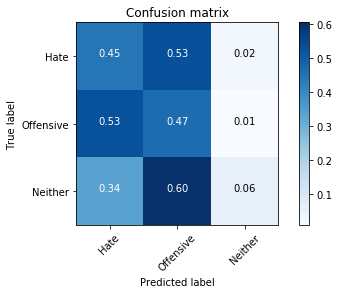

In [17]:
#using sigmoid

rawdata = readData('labeled_data.csv')
x_train, x_test, Y_train, Y_test = train_test_split(rawdata['tweet'], rawdata['class'], test_size=0.1, random_state=42)

for igram_1 in [0]:
    for b in [1]:
        for mode in ['count']:
            print('igram={0}, b={1}, mode={2}'.format(igram_1+1,b,mode))
            X_train, X_test = Feature_Selection(x_train, x_test,Y_train,c=0.01,igram=igram_1+1, b=b, mode=mode)
            print("feature selected")
            SVMTwitter(X_train,Y_train,X_test,Y_test,nfolds=4)

igram=1, b=0, mode=count
feature selected
best parameter is {'decision_function_shape': 'ovo', 'class_weight': 'balanced', 'kernel': 'linear', 'C': 1, 'probability': True}
Normalized confusion matrix
[[ 0.61  0.14  0.25]
 [ 0.16  0.76  0.08]
 [ 0.01  0.02  0.96]]


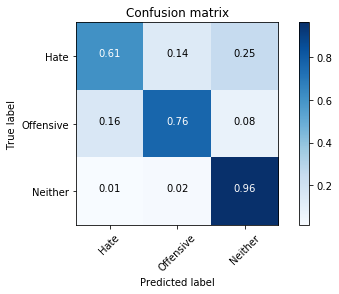

igram=1, b=0, mode=tfidf
feature selected
best parameter is {'decision_function_shape': 'ovo', 'class_weight': 'balanced', 'kernel': 'linear', 'C': 1, 'probability': True}
Normalized confusion matrix
[[ 0.57  0.15  0.28]
 [ 0.14  0.76  0.1 ]
 [ 0.04  0.02  0.94]]


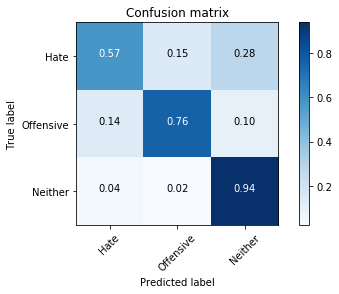

igram=1, b=1, mode=count
feature selected
best parameter is {'decision_function_shape': 'ovo', 'class_weight': 'balanced', 'kernel': 'linear', 'C': 1, 'probability': True}
Normalized confusion matrix
[[ 0.62  0.13  0.25]
 [ 0.15  0.77  0.08]
 [ 0.01  0.02  0.96]]


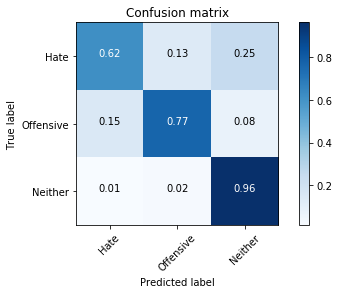

igram=1, b=1, mode=tfidf
feature selected


In [ ]:
#using linear kernel c=0.01
rawdata = readData('labeled_data.csv')
x_train, x_test, Y_train, Y_test = train_test_split(rawdata['tweet'], rawdata['class'], test_size=0.1, random_state=42)

for igram_1 in range(2):
    for b in range(2):
        for mode in ['count','tfidf']:
            print('igram={0}, b={1}, mode={2}'.format(igram_1+1,b,mode))
            X_train, X_test = Feature_Selection(x_train, x_test,Y_train,c=0.01,igram=igram_1+1, b=b, mode=mode)
            print("feature selected")
            SVMTwitter(X_train,Y_train,X_test,Y_test,nfolds=4)

igram=1, b=0, mode=count
feature selected
best parameter is {'decision_function_shape': 'ovo', 'class_weight': 'balanced', 'kernel': 'rbf', 'C': 1, 'probability': True}
Normalized confusion matrix
[[ 0.21  0.36  0.43]
 [ 0.14  0.72  0.15]
 [ 0.15  0.25  0.61]]


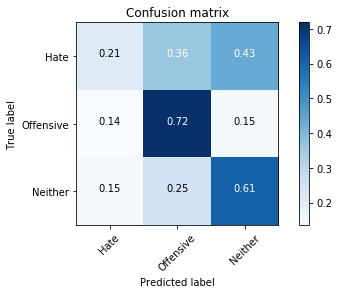

igram=1, b=0, mode=tfidf
feature selected
best parameter is {'decision_function_shape': 'ovo', 'class_weight': 'balanced', 'kernel': 'rbf', 'C': 1, 'probability': True}
Normalized confusion matrix
[[ 0.21  0.49  0.3 ]
 [ 0.19  0.63  0.18]
 [ 0.15  0.39  0.46]]


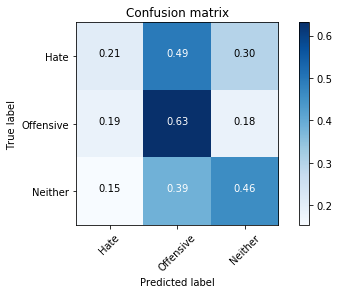

igram=1, b=1, mode=count
feature selected
best parameter is {'decision_function_shape': 'ovo', 'class_weight': 'balanced', 'kernel': 'rbf', 'C': 1, 'probability': True}
Normalized confusion matrix
[[ 0.21  0.37  0.41]
 [ 0.13  0.72  0.15]
 [ 0.15  0.24  0.61]]


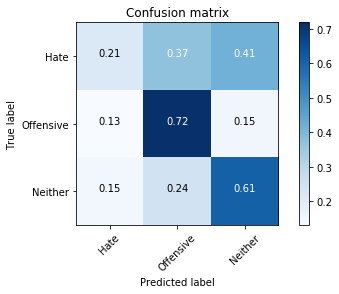

igram=1, b=1, mode=tfidf
feature selected
best parameter is {'decision_function_shape': 'ovo', 'class_weight': 'balanced', 'kernel': 'rbf', 'C': 1, 'probability': True}
Normalized confusion matrix
[[ 0.21  0.49  0.3 ]
 [ 0.18  0.63  0.18]
 [ 0.15  0.39  0.46]]


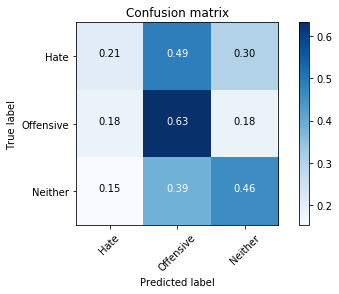

igram=2, b=0, mode=count
feature selected
best parameter is {'decision_function_shape': 'ovo', 'class_weight': 'balanced', 'kernel': 'rbf', 'C': 1, 'probability': True}
Normalized confusion matrix
[[ 0.19  0.48  0.33]
 [ 0.13  0.7   0.16]
 [ 0.13  0.34  0.52]]


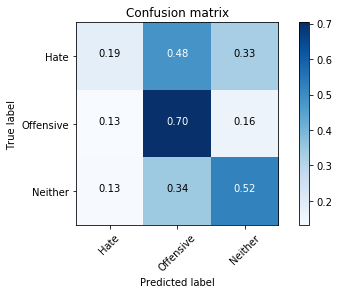

igram=2, b=0, mode=tfidf
feature selected
best parameter is {'decision_function_shape': 'ovo', 'class_weight': 'balanced', 'kernel': 'rbf', 'C': 1, 'probability': True}
Normalized confusion matrix
[[ 0.16  0.54  0.3 ]
 [ 0.16  0.66  0.18]
 [ 0.15  0.44  0.41]]


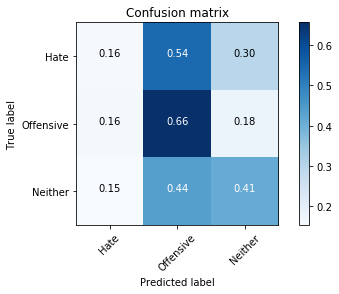

igram=2, b=1, mode=count
feature selected
best parameter is {'decision_function_shape': 'ovo', 'class_weight': 'balanced', 'kernel': 'rbf', 'C': 1, 'probability': True}
Normalized confusion matrix
[[ 0.19  0.49  0.32]
 [ 0.14  0.69  0.17]
 [ 0.14  0.36  0.5 ]]


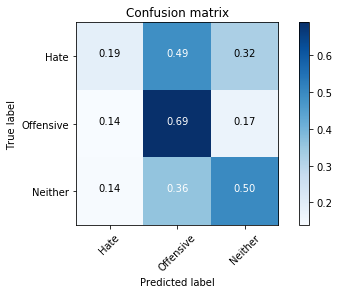

igram=2, b=1, mode=tfidf
feature selected
best parameter is {'decision_function_shape': 'ovo', 'class_weight': 'balanced', 'kernel': 'rbf', 'C': 1, 'probability': True}
Normalized confusion matrix
[[ 0.16  0.54  0.3 ]
 [ 0.16  0.66  0.18]
 [ 0.15  0.44  0.41]]


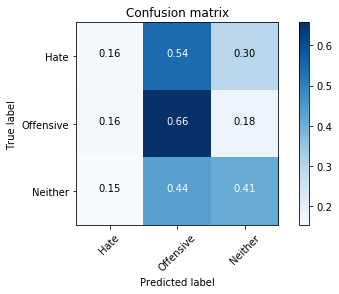

In [13]:
#using linear kernel c=0.01
rawdata = readData('labeled_data.csv')
x_train, x_test, Y_train, Y_test = train_test_split(rawdata['tweet'], rawdata['class'], test_size=0.1, random_state=42)

for igram_1 in range(2):
    for b in range(2):
        for mode in ['count','tfidf']:
            print('igram={0}, b={1}, mode={2}'.format(igram_1+1,b,mode))
            X_train, X_test = Feature_Selection(x_train, x_test,Y_train,c=0.01,igram=igram_1+1, b=b, mode=mode)
            print("feature selected")
            SVMTwitter(X_train,Y_train,X_test,Y_test,nfolds=4)

igram=1, b=0, mode=count
feature selected
best parameter is {'kernel': 'linear', 'class_weight': 'balanced', 'probability': True, 'decision_function_shape': 'ovo', 'C': 1}
Normalized confusion matrix
[[ 0.61  0.14  0.25]
 [ 0.16  0.76  0.08]
 [ 0.01  0.02  0.96]]


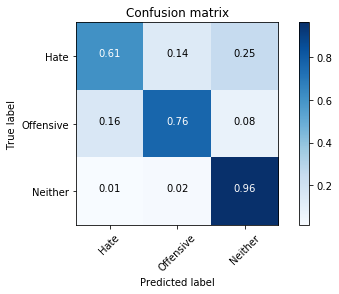

igram=2, b=0, mode=count
feature selected
best parameter is {'kernel': 'linear', 'class_weight': 'balanced', 'probability': True, 'decision_function_shape': 'ovo', 'C': 1}
Normalized confusion matrix
[[ 0.61  0.14  0.25]
 [ 0.16  0.76  0.08]
 [ 0.01  0.02  0.96]]


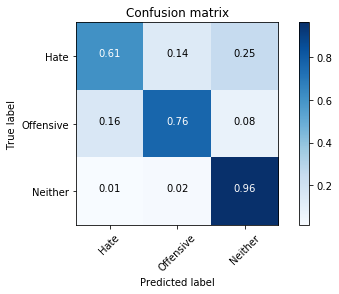

In [11]:

'''use iteration to select the features that can optimize the model performance 
from the features set(ngrams:  1 gram, 2 gram,modes: binary, count, frequency, TFIDF)

The plot don't show all the results. Running every model is too slow in this case, 
we actually tune the parameter seperately.
'''
rawdata = readData('labeled_data.csv')
x_train, x_test, Y_train, Y_test = train_test_split(rawdata['tweet'], rawdata['class'], test_size=0.1, random_state=42)

for igram_1 in range(2):
    for b in [0,1]:
        for mode in ['count','tfidf']:
            print('igram={0}, b={1}, mode={2}'.format(igram_1+1,b,mode))
            X_train, X_test = Feature_Selection(x_train, x_test,Y_train,c=0.01,igram=igram_1+1, b=b, mode=mode)
            print("feature selected")
            SVMTwitter(X_train,Y_train,X_test,Y_test,nfolds=4)